In [2]:
import torch 
import torchvision
from torchvision.transforms.functional import pil_to_tensor
import matplotlib.pyplot as plt
import tyro
from pathlib import Path
import viser
import trimesh
import viser.transforms as tf
import numpy as np
import time

In [3]:
mesh = trimesh.load('objs/cow.obj')

In [4]:
pitch = 0.005

In [14]:
num_points = int((mesh.bounds[1][0] - mesh.bounds[0][0]) / pitch)
heights = np.linspace(mesh.bounds[0][0], mesh.bounds[1][0], num_points)
max_width = mesh.bounds[1][1] - mesh.bounds[0][1]
max_length = mesh.bounds[1][2] - mesh.bounds[0][2]

sections = mesh.section_multiplane(plane_origin=mesh.bounds[1], plane_normal=[1,0,0], heights=heights)
len(sections)

2088

In [16]:
sections[30].metadata["to_3D"]

array([[ 0.        ,  0.        ,  1.        ,  1.70238127],
       [ 0.        ,  1.        ,  0.        ,  2.75972   ],
       [-1.        ,  0.        ,  0.        ,  1.701405  ],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [12]:
sections = [i for i in sections if i is not None]

torch.Size([1, 880, 521])


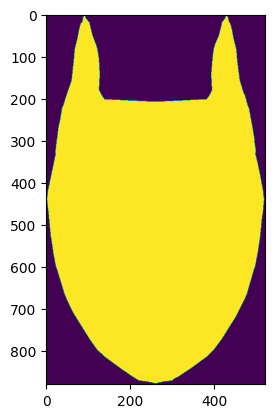

In [13]:
im_sample = sections[23].rasterize(pitch=pitch)
tensor_im = pil_to_tensor(im_sample)
print(tensor_im.shape)
plt.imshow(tensor_im[0])


In [6]:
planes = []
max_width = 0
max_length = 0
for s in sections:
    if s is not None:
        new_plane = pil_to_tensor(s.rasterize(pitch=pitch))[0]
        max_width = max(max_width, new_plane.shape[1])
        max_length = max(max_length, new_plane.shape[0])
        planes.append(new_plane)
for i in range(len(planes)):
    width_pad_left = (max_width - planes[i].shape[1]) // 2
    length_pad_top = (max_length - planes[i].shape[0]) // 2
    width_pad_right = max_width - planes[i].shape[1] - width_pad_left
    length_pad_bottom = max_length - planes[i].shape[0] - length_pad_top
    planes[i] = torch.nn.functional.pad(planes[i], (width_pad_left, width_pad_right, length_pad_top, length_pad_bottom))
planes = torch.stack(planes).unsqueeze(3)
# make planes rgb
planes = planes.repeat(1, 1, 1, 3).float()
print(planes.shape)

torch.Size([2064, 1128, 685, 3])


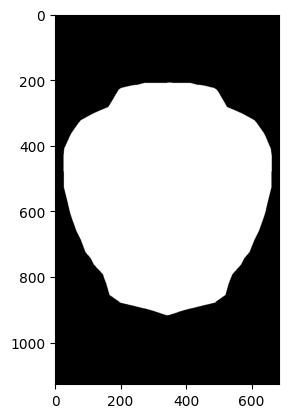

In [7]:
plt.imshow(planes[600].squeeze(2))